- Import all necessary library

In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


- Import the data into Jupyter

In [2]:
projectdata = np.genfromtxt("Project1-Data.txt", dtype=str)
projectdata1=np.genfromtxt("TOBS.txt", dtype=float)
projectdata=projectdata.T


unix= projectdata[0].astype(float)
date= projectdata[1]
time = projectdata[2]
TOBS=projectdata1
snowdepth = projectdata[3].astype(float)

print(TOBS[0:87127])

[-14.2 -14.7 -14.2 ...  -4.1  -2.6  -2.5]


- change the str date into date time object

In [3]:
date_1 = []
for idx in range(len(date[0:88000])):
    date_1 += [dt.datetime.strptime(date[idx]+'_______'+time[idx],
            "%m/%d/%y_______%H:%M")]
print(date_1[87126])
print(snowdepth[87126])

2020-02-19 12:00:00
70.0


- Visualize snow depth trend for the past 10 years

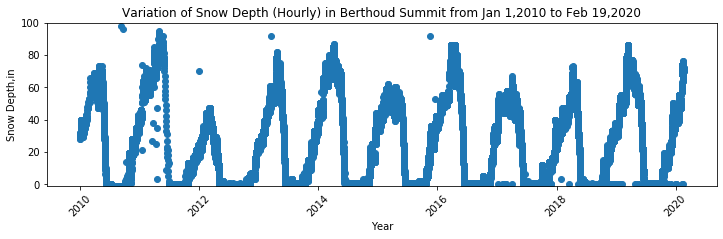

In [4]:
plt.figure(figsize=(12,3))
plt.scatter(date_1[0:87127],snowdepth[0:87127])#10/1/19 until 2/19/20
plt.title("Variation of Snow Depth (Hourly) in Berthoud Summit from Jan 1,2010 to Feb 19,2020")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Snow Depth,in")
plt.ylim(-1,100)
plt.show()

- Below is the resources that we have researched in order to know the duration of El-Nino/La-Nina. Based on our research, the probability of having ENSO climate for 2020 is higher than having an El-Nino/La-Nina. Therefore, we will use the snowdepth data on 2010/2011 as we do not have El-Nino on that period
- We use snowdepth data for 2010/2011 and generate polynomial curve. We will use the that polynomial curve to predict the snowdepth on 28/3/2020


- https://barbagroup.github.io/essential_skills_RRC/jupyter/1/
- It is thought that there have been at least 30 El Niño events since 1900, with the 1982–83, 1997–98 and 2014–16 events among the strongest on record.[13][14] Since 2000, El Niño events have been observed in 2002–03, 2004–05, 2006–07, 2009–10, 2014–16,[13] and 2018–19.
- Model predictions and expert opinion indicate a 65% chance of ENSO-neutral conditions continuing during December-February 2019-2020, while the probability for El Niño is near 30%. For the March-May 2020 season, the chance for ENSO-neutral is 60%, El Niño is 25% and La Niña is 15%.
- https://www.9news.com/article/weather/weather-colorado/this-is-how-colorado-snowpack-is-measured/73-506663674
- https://www.weather.gov/media/owlie/2018_ENSO.pdf
- https://en.wikipedia.org/wiki/Effects_of_the_El_Ni%C3%B1o%E2%80%93Southern_Oscillation_in_the_United_States
- (Prediction https://iri.columbia.edu/our-expertise/climate/forecasts/enso/current/?enso_tab=enso-quicklook

- We plot the temperature vs time for the past 10 years to see if there's any correlation with snowdepth and temperature. We conclude there is no clear correlation between those two parameters

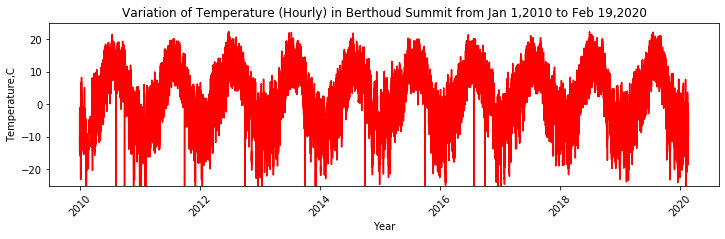

In [5]:
plt.figure(figsize=(12,3))
plt.plot(date_1,TOBS,'r')#10/1/19 until 2/19/20
plt.title("Variation of Temperature (Hourly) in Berthoud Summit from Jan 1,2010 to Feb 19,2020")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Temperature,C")
plt.ylim(-25,25)
plt.show()

- We split every peaks for easier visualization

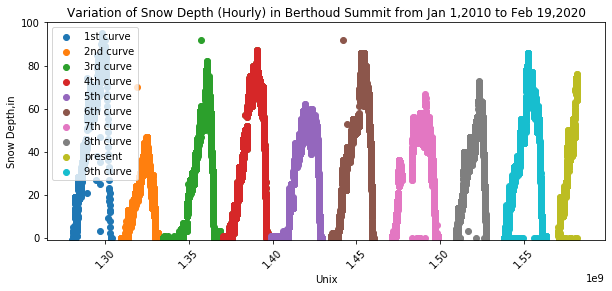

In [6]:
plt.figure(figsize=(10,4))
plt.scatter(unix[5000:11500],snowdepth[5000:11500],label="1st curve")
plt.scatter(unix[13000:19500],snowdepth[13000:19500],label="2nd curve")
plt.scatter(unix[20000:38500],snowdepth[20000:38500],label="3rd curve")
plt.scatter(unix[30000:38500],snowdepth[30000:38500],label="4th curve")
plt.scatter(unix[38000:46500],snowdepth[38000:46500],label="5th curve")
plt.scatter(unix[48000:55000],snowdepth[48000:55000],label="6th curve")
plt.scatter(unix[58000:64000],snowdepth[58000:64000],label="7th curve")
plt.scatter(unix[67000:72000],snowdepth[67000:72000],label="8th curve")
plt.scatter(unix[84000:87126],snowdepth[84000:87126],label="present")#10/1/19 until 2/19/20
plt.scatter(unix[75000:82000],snowdepth[75000:82000],label="9th curve")
plt.title("Variation of Snow Depth (Hourly) in Berthoud Summit from Jan 1,2010 to Feb 19,2020")
plt.xlabel("Unix")
plt.xticks(rotation=45)
plt.ylabel("Snow Depth,in")
plt.ylim(-1,100)
plt.legend()
plt.show()


- We plot the snowdepth and generate polynomial curve for 2010/2011. Based on figure below, it can be seen that we have a lot of negative values (-99.9). Cleaning up the data is required to get a better fit for polynomial curve

(-120, 100)

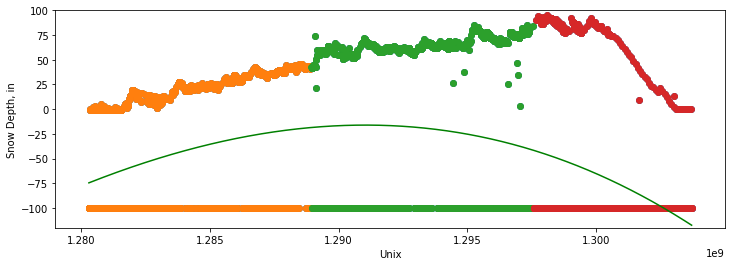

In [7]:
plt.figure(figsize=(12,4))
pol_coeff=np.polyfit(unix[5000:11500],snowdepth[5000:11500],3)
yfit=np.poly1d(pol_coeff)
plt.plot(unix[5000:11500],yfit(unix[5000:11500]),'g')
plt.scatter(unix[5000:11500],snowdepth[5000:11500])
plt.scatter(unix[5000:7400],snowdepth[5000:7400])
plt.scatter(unix[7400:9800],snowdepth[7400:9800])
plt.scatter(unix[9800:11500],snowdepth[9800:11500])

plt.xlabel("Unix")
plt.ylabel("Snow Depth, in")
plt.ylim(-120,100)

In [8]:
print(snowdepth[5000:11500])
print(date_1[5000:11500])

[-99.9 -99.9 -99.9 ... -99.9 -99.9 -99.9]
[datetime.datetime(2010, 10, 7, 8, 0), datetime.datetime(2010, 10, 7, 9, 0), datetime.datetime(2010, 10, 7, 10, 0), datetime.datetime(2010, 10, 7, 11, 0), datetime.datetime(2010, 10, 7, 12, 0), datetime.datetime(2010, 10, 7, 13, 0), datetime.datetime(2010, 10, 7, 14, 0), datetime.datetime(2010, 10, 7, 15, 0), datetime.datetime(2010, 10, 7, 16, 0), datetime.datetime(2010, 10, 7, 17, 0), datetime.datetime(2010, 10, 7, 18, 0), datetime.datetime(2010, 10, 7, 19, 0), datetime.datetime(2010, 10, 7, 20, 0), datetime.datetime(2010, 10, 7, 21, 0), datetime.datetime(2010, 10, 7, 22, 0), datetime.datetime(2010, 10, 7, 23, 0), datetime.datetime(2010, 10, 8, 0, 0), datetime.datetime(2010, 10, 8, 1, 0), datetime.datetime(2010, 10, 8, 2, 0), datetime.datetime(2010, 10, 8, 3, 0), datetime.datetime(2010, 10, 8, 4, 0), datetime.datetime(2010, 10, 8, 5, 0), datetime.datetime(2010, 10, 8, 6, 0), datetime.datetime(2010, 10, 8, 7, 0), datetime.datetime(2010, 10, 8, 

- We import the 2010/2011 data that has been cleaned in Excel.

In [9]:
projectdata2 = np.genfromtxt("Cleaned data.txt", dtype=str)
projectdata2=projectdata2.T
snowdepth2=projectdata2[3].astype(float)
unix2=projectdata2[0].astype(float)
print(unix2[5000:11500])#whole unix for the 1st peak
print(snowdepth2[5000:11500])#whole snowdepth for the 1st peak
print(unix2[5256])#10/21/2010
print(snowdepth2[5256])#10/21/2010
print(unix2[11100])#6/28/2010
print(snowdepth2[11092])#6/28/2010

[1.2803040e+09 1.2803076e+09 1.2803112e+09 ... 1.3036932e+09 1.3036968e+09
 1.3037004e+09]
[-1. -1. -1. ...  0.  0.  0.]
1281225600.0
0.0
1302264000.0
21.0


- We generated polynomial curve for the whole range of 2010/2011 data, but the curve is not a best fit curve. 

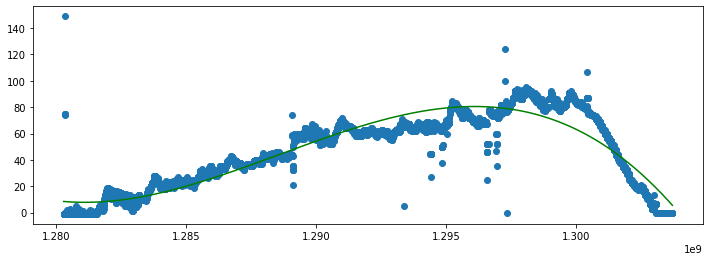

In [10]:
plt.figure(figsize=(12,4))
plt.scatter(unix2[5000:11500],snowdepth2[5000:11500])
pol_coeff=np.polyfit(unix2[5000:11500],snowdepth2[5000:11500],3)
yfit=np.poly1d(pol_coeff)
plt.plot(unix2[5000:11500],yfit(unix2[5000:11500]),'g')


- We separate the curve into 3 different section so that our polynomial curve fit to the data

In [11]:
pol_coeff=np.polyfit(unix2[5000:11500],snowdepth2[5000:11500],3)
yfit=np.poly1d(pol_coeff)
pol_coeff1=np.polyfit(unix2[5000:7400],snowdepth2[5000:7400],3)
yfit1=np.poly1d(pol_coeff1)
pol_coeff2=np.polyfit(unix2[7400:9800],snowdepth2[7400:9800],3)
yfit2=np.poly1d(pol_coeff2)
pol_coeff3=np.polyfit(unix2[9800:11500],snowdepth2[9800:11500],3)
yfit3=np.poly1d(pol_coeff3)

- Benda alah bawah ni kira error. Kira error based on standard deviation of the real data, bukan polyfit data

In [12]:
x1=unix2[5000:7400]
y1=snowdepth2[5000:7400]
e1=np.std(snowdepth2[5000:7400])
x2=unix2[7400:9800]
y2=snowdepth2[7400:9800]
e2=np.std(snowdepth2[7400:9800])
x3=unix2[9800:11500]
y3=snowdepth2[9800:11500]
e3=np.std(snowdepth2[9800:11500])

- Plot the 2010/2011 data with 3 different polynomial curve that fit the data

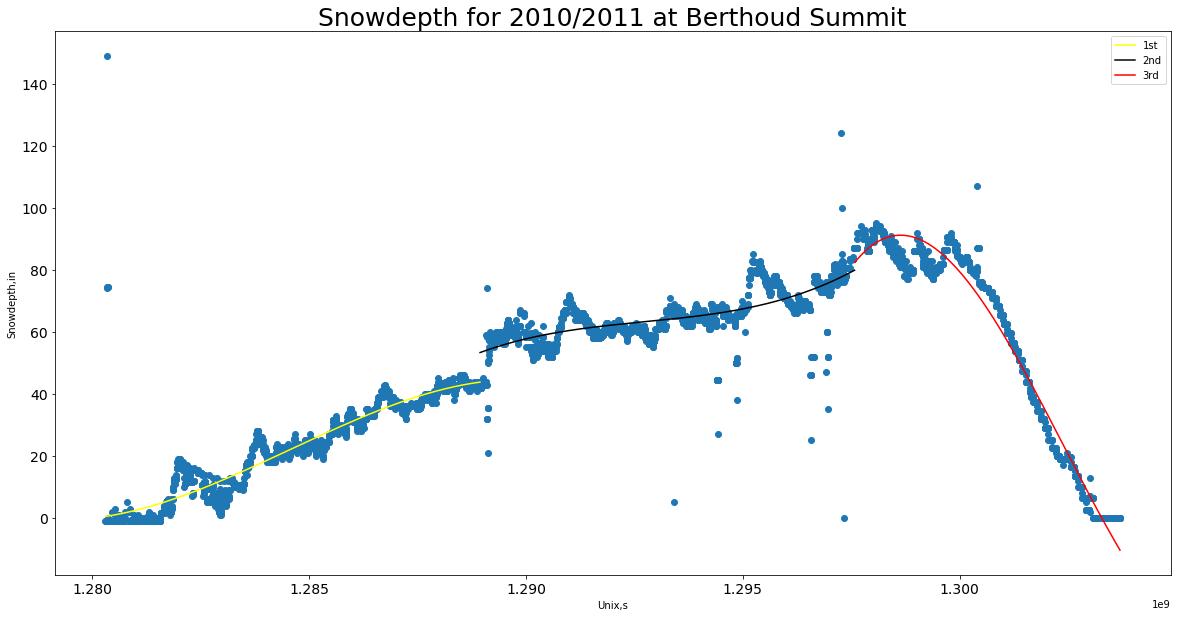

In [13]:
plt.figure(figsize=(20,10))
plt.title("Snowdepth for 2010/2011 at Berthoud Summit",fontdict = {'fontsize' : 25})
plt.xlabel("Unix,s")
plt.xticks(fontsize=14)
plt.ylabel("Snowdepth,in")
plt.yticks(fontsize=14)
plt.scatter(unix2[5000:11500],snowdepth2[5000:11500])
plt.plot(unix2[5000:7400],yfit1(unix2[5000:7400]),c="yellow",label="1st")
plt.plot(unix2[7400:9800],yfit2(unix2[7400:9800]),'black',label="2nd")
plt.plot(unix2[9800:11500],yfit3(unix2[9800:11500]),'red',label="3rd")
plt.legend()
plt.show()

- On 3/28/2011(UNIX=1295182800) at 1pm, snow depth is 79 in

In [27]:
print(unix2[9800])#1/15/11 @ 8am row=7403
print(snowdepth2[7400])
print(unix2[9133]) #3/28/11 @ 1pm row=9136
print(snowdepth2[9133])

1297584000.0
43.0
1295182800.0
79.0


- Below is the snowdepth and unix time for the most current data we have on 19/2/2020 at 1pm

In [15]:
print(unix[87126])
print(snowdepth[87126])

1582099200.0
70.0


In [16]:
x1=unix2[5000:7400]
y1=snowdepth2[5000:7400]
e1=np.std(snowdepth2[5000:7400])
x2=unix2[7400:9800]
y2=snowdepth2[7400:9800]
e2=np.std(snowdepth2[7400:9800])
x3=unix2[9800:11500]
y3=snowdepth2[9800:11500]
e3=np.std(snowdepth2[9800:11500])

In [17]:
print(unix[84000])#10/12/2019
print(unix[87126])#2/19/2020

1570845600.0
1582099200.0


- Below is the most current snowdepth data

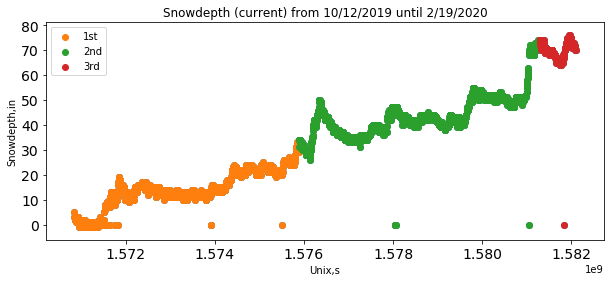

In [18]:
plt.figure(figsize=(10,4))
plt.title("Snowdepth (current) from 10/12/2019 until 2/19/2020")
plt.scatter(unix[84000:87126],snowdepth[84000:87126])
plt.scatter(unix[84000:85400],snowdepth[84000:85400],label="1st")
plt.scatter(unix[85400:86900],snowdepth[85400:86900],label="2nd")
plt.scatter(unix[86900:87126],snowdepth[86900:87126],label="3rd")
plt.xlabel("Unix,s")
plt.xticks(fontsize=14)
plt.ylabel("Snowdepth,in")
plt.yticks(fontsize=14)
plt.legend()
plt.show()

In [19]:
pol_coeff3=np.polyfit(unix[87050:87126],snowdepth[87050:87126],2)
yfit3=np.poly1d(pol_coeff3)

In [20]:
x3=unix[84000:87126]
y3=snowdepth[84000:87126]
e3=np.std(snowdepth[84000:87126])

- Import selected regression data for 2019/2020 that has been chose from 2010/2011 snowdepth

In [21]:
regressiondata = np.genfromtxt("RegressionData.txt", dtype=str)
regressiondata=regressiondata.T
unixreg=regressiondata[0].astype(float)
snowdepthreg=regressiondata[3].astype(float)

In [22]:
pol_coeffreg=np.polyfit(unixreg,snowdepthreg,3)
yfitreg=np.poly1d(pol_coeffreg)

- plot the polynomial data of 2019/2020

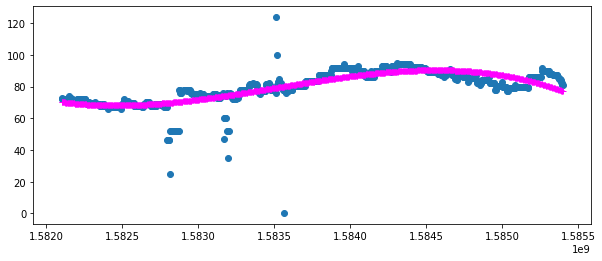

In [23]:
plt.figure(figsize=(10,4))
plt.plot(unixreg, yfitreg(unixreg),'b+',c='magenta',label="extrapolation")
plt.scatter(unixreg,snowdepthreg)

- calculate the standard deviation of the snowdepth from the start of the peak in 2019 up until the current data

In [24]:
ereg=np.std(snowdepth[84000:87126])
print(ereg)

19.308150433192324


- Figure below is the prediction

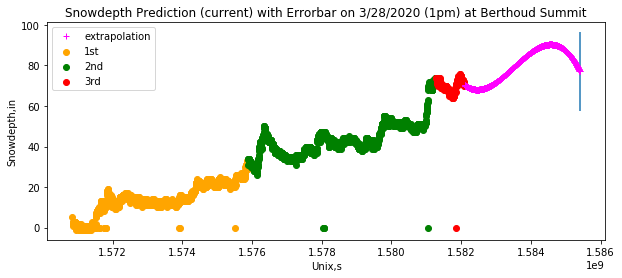

In [25]:
plt.figure(figsize=(10,4))

plt.title("Snowdepth Prediction (current) with Errorbar on 3/28/2020 (1pm) at Berthoud Summit")
plt.scatter(unix[84000:85400],snowdepth[84000:85400],c='orange',label="1st")
plt.scatter(unix[85400:86900],snowdepth[85400:86900],c='green',label="2nd")
plt.scatter(unix[86900:87126],snowdepth[86900:87126],c='red',label="3rd")
plt.plot(unixreg, yfitreg(unixreg),'b+',c='magenta',label="extrapolation")
plt.errorbar(unixreg[916], yfitreg(unixreg[916]),yerr=ereg)
plt.xlabel("Unix,s")
plt.ylabel("Snowdepth,in")

plt.legend()
plt.show()

- Final prediction below at 1pm at Berthoud Summit (28/1/2020) with +-19.3 in

In [26]:
print(yfitreg(unixreg[916]))
print(unixreg[916])

77.05586242675781
1585400400.0
